# Data preprocessing


In [1]:
# import diagnosis_icd dataset
import pandas as pd
import matplotlib.pyplot as plt

## Import admission dataset

In [2]:
admissions = pd.read_csv('../data/physionet.org/files/mimiciv/3.1/hosp/admissions.csv')
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546028 entries, 0 to 546027
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            546028 non-null  int64 
 1   hadm_id               546028 non-null  int64 
 2   admittime             546028 non-null  object
 3   dischtime             546028 non-null  object
 4   deathtime             11790 non-null   object
 5   admission_type        546028 non-null  object
 6   admit_provider_id     546024 non-null  object
 7   admission_location    546027 non-null  object
 8   discharge_location    396210 non-null  object
 9   insurance             536673 non-null  object
 10  language              545253 non-null  object
 11  marital_status        532409 non-null  object
 12  race                  546028 non-null  object
 13  edregtime             379240 non-null  object
 14  edouttime             379240 non-null  object
 15  hospital_expire_f

In [3]:
admissions.head(10)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
5,10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NaN,EW EMER.,P42H7G,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,English,MARRIED,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0
6,10000084,29888819,2160-12-28 05:11:00,2160-12-28 16:07:00,NaN,EU OBSERVATION,P35NE4,PHYSICIAN REFERRAL,NaN,Medicare,English,MARRIED,WHITE,2160-12-27 18:32:00,2160-12-28 16:07:00,0
7,10000108,27250926,2163-09-27 23:17:00,2163-09-28 09:04:00,NaN,EU OBSERVATION,P40JML,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2163-09-27 16:18:00,2163-09-28 09:04:00,0
8,10000117,22927623,2181-11-15 02:05:00,2181-11-15 14:52:00,NaN,EU OBSERVATION,P47EY8,EMERGENCY ROOM,NaN,Medicaid,English,DIVORCED,WHITE,2181-11-14 21:51:00,2181-11-15 09:57:00,0
9,10000117,27988844,2183-09-18 18:10:00,2183-09-21 16:30:00,NaN,OBSERVATION ADMIT,P13ACE,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicaid,English,DIVORCED,WHITE,2183-09-18 08:41:00,2183-09-18 20:20:00,0


In [4]:
# count the number of distinct patients
admissions.subject_id.nunique()

223452

## Import diagnosis_icd dataset

In [5]:
diagnosis_icd = pd.read_csv('../data/physionet.org/files/mimiciv/3.1/hosp/diagnoses_icd.csv')
diagnosis_icd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364488 entries, 0 to 6364487
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   subject_id   int64 
 1   hadm_id      int64 
 2   seq_num      int64 
 3   icd_code     object
 4   icd_version  int64 
dtypes: int64(4), object(1)
memory usage: 242.8+ MB


In [6]:
diagnosis_icd.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [7]:
# count the percentage of icd9 and icd10 codes
diagnosis_icd['icd_version'].value_counts(normalize=True)


icd_version
10    0.542973
9     0.457027
Name: proportion, dtype: float64

In [8]:
# count, for each icd category, the number of distinct icd codes
diagnosis_icd.groupby('icd_version')['icd_code'].nunique()

icd_version
9      9143
10    19440
Name: icd_code, dtype: int64

In [9]:
# count mean occurrency for a single icd9 or icd10 codes in the dataset
diagnosis_icd['icd_version'].value_counts()/diagnosis_icd.groupby('icd_version')['icd_code'].nunique()

icd_version
9     318.138576
10    177.764763
dtype: float64

In [10]:
def calculate_icd_percentage(df, threshold):
    """
    Calculate the percentage of distinct ICD codes that appear more than a given threshold in the dataset.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the ICD codes.
    threshold (int): The minimum number of occurrences for an ICD code to be included in the calculation.
    
    Returns:
    float: The percentage of distinct ICD codes that appear more than the given threshold.
    """
    icd_code_counts = df['icd_code'].value_counts()
    icd_code_sum5000 = icd_code_counts[icd_code_counts > threshold]
    return (len(icd_code_sum5000) / len(icd_code_counts)) * 100

# Example usage
calculate_icd_percentage(diagnosis_icd, 5000)

0.8122680484559904

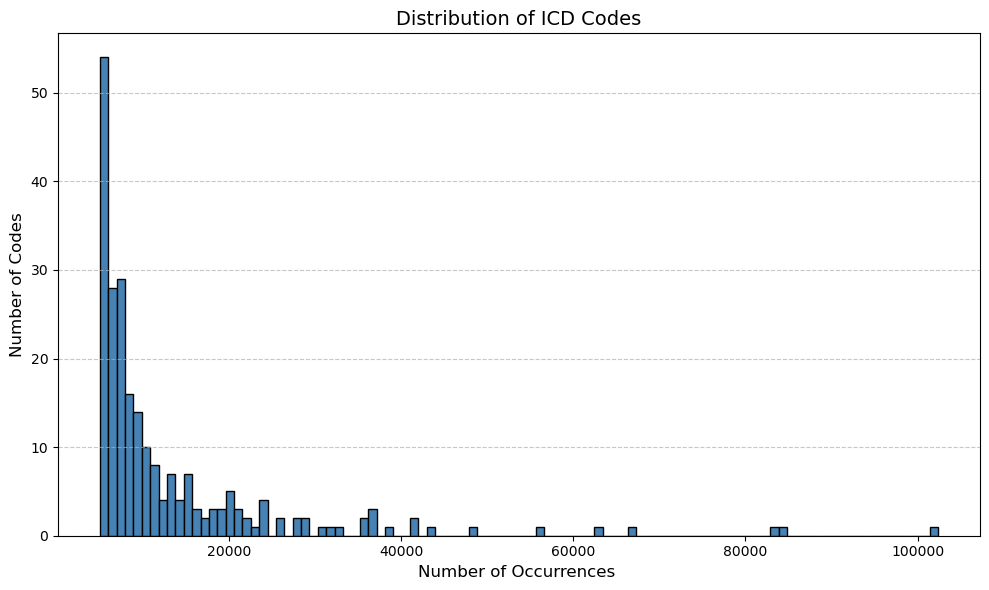

In [61]:
def plot_icd_code_distribution(df, threshold=5000):
    """
    Plots the distribution of ICD codes in a DataFrame, filtered by a specified threshold.
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the ICD codes.
    threshold (int, optional): The minimum number of occurrences for an ICD code to be included in the plot. Default is 5000.
    Returns:
    None: This function does not return any value. It displays a histogram plot of the ICD code distribution.
    """
    # Filter the DataFrame based on the counts of the 'icd_code' column
    icd_code_counts = df['icd_code'].value_counts()
    filtered_df = df[df['icd_code'].isin(icd_code_counts[icd_code_counts > threshold].index)]
    
    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['icd_code'].value_counts(), bins=100, color='steelblue', edgecolor='black')
    
    # Set axis labels and title
    plt.xlabel('Number of Occurrences ', fontsize=12)
    plt.ylabel('Number of Codes', fontsize=12)
    plt.title('Distribution of ICD Codes', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Save or show the plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_icd_code_distribution(diagnosis_icd, threshold=5000)

In [31]:
# Count the total number of distinct patients in the admissions dataset
total_patients = admissions['subject_id'].nunique()
print(f"Total number of patients: {total_patients}")

Total number of patients: 223452


In [12]:
def filter_diagnosis_icd(admissions_df, diagnosis_icd_df):
    """
    Filters the admissions and diagnosis ICD dataframes to exclude patients who have been admitted to the hospital only once.
    Parameters:
    admissions_df (pd.DataFrame): DataFrame containing admissions data with at least a 'subject_id' column.
    diagnosis_icd_df (pd.DataFrame): DataFrame containing diagnosis ICD data with at least a 'subject_id' column.
    Returns:
    tuple: A tuple containing two DataFrames:
        - admissions_filtered (pd.DataFrame): Filtered admissions DataFrame with patients admitted more than once.
        - diagnosis_icd_filtered (pd.DataFrame): Filtered diagnosis ICD DataFrame with patients admitted more than once.
    """
    # Filter out from admissions table all the patients that have been admitted to the hospital only one time
    admissions_filtered = admissions_df[admissions_df['subject_id'].isin(admissions_df['subject_id'].value_counts()[admissions_df['subject_id'].value_counts() > 1].index)]
    admissions_filtered.reset_index(drop=True, inplace=True)

    # Filter out from diagnosis_icd table all the patients that have been admitted to the hospital only one time
    diagnosis_icd_filtered = diagnosis_icd_df[diagnosis_icd_df['subject_id'].isin(admissions_filtered['subject_id'])]
    diagnosis_icd_filtered.reset_index(drop=True, inplace=True)
    
    return admissions_filtered, diagnosis_icd_filtered

# Example usage
admissions_filtered, diagnosis_icd_filtered = filter_diagnosis_icd(admissions, diagnosis_icd)
diagnosis_icd_filtered.info(), admissions_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5183974 entries, 0 to 5183973
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   subject_id   int64 
 1   hadm_id      int64 
 2   seq_num      int64 
 3   icd_code     object
 4   icd_version  int64 
dtypes: int64(4), object(1)
memory usage: 197.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422739 entries, 0 to 422738
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            422739 non-null  int64 
 1   hadm_id               422739 non-null  int64 
 2   admittime             422739 non-null  object
 3   dischtime             422739 non-null  object
 4   deathtime             6539 non-null    object
 5   admission_type        422739 non-null  object
 6   admit_provider_id     422735 non-null  object
 7   admission_location    422739 non-null  object
 8   discharge_location    311044 non-nu

(None, None)

In [13]:
# number of distinct patients that have been admitted to the hospital more than one time
admissions_filtered['subject_id'].nunique()

100163

In [14]:
# percentage of patients that have been admitted to the hospital more than one time
(admissions_filtered['subject_id'].nunique()/admissions['subject_id'].nunique())*100

44.825286862502914

In [15]:
# percentage of patients that have no more than five visits to the hospital
(admissions_filtered['subject_id'].value_counts() <= 5).sum()/admissions_filtered['subject_id'].nunique()*100

81.89850543613909

# Convert ICD10 code to ICD9 code

In [16]:
# load 2018_I10gem.txt file
icd10_gem = pd.read_csv('../data/diagnosis_gems_2018/2018_I10gem.txt',sep='\s+' , header=None, names=['icd10', 'icd9', 'flags'], dtype={'icd10': str, 'icd9': str, 'flags': str})
icd10_gem.head()

,icd10,icd9,flags
0,A000,0010,00000
1,A001,0011,00000
2,A009,0019,00000
3,A0100,0020,10000
4,A0101,0020,10000


In [17]:
icd10_gem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81593 entries, 0 to 81592
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   icd10   81593 non-null  object
 1   icd9    81593 non-null  object
 2   flags   81593 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [18]:
icd10_gem['icd10'].nunique()

71704

In [19]:
# Function to map ICD-10 codes to ICD-9 codes
def icd10_to_icd9(df, df_gem):
    """
    Convert ICD-10 codes in a DataFrame to ICD-9 codes using a given GEM (General Equivalence Mappings) DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing the data with ICD codes. It must have columns 'icd_code' and 'icd_version'.
    df_gem (pd.DataFrame): DataFrame containing the GEM mappings between ICD-10 and ICD-9 codes. It must have columns 'icd10' and 'icd9'.

    Returns:
    pd.DataFrame: DataFrame with ICD-10 codes converted to ICD-9 codes where applicable. The 'icd_version' column is updated to 9 for converted codes.
    
    Notes:
    - If an ICD-10 code does not have a corresponding ICD-9 mapping, the function assigns 'none' to the 'icd_code' and sets 'icd_version' to 9.
    - If the 'icd_version' is not 10, the function leaves the 'icd_code' and 'icd_version' unchanged.
    """
    def map_code(row):
        # Check if the version is ICD-10
        if row['icd_version'] == 10:
            # Find the ICD-9 mapping
            mapping = df_gem[df_gem['icd10'] == row['icd_code']]
            if not mapping.empty:
                return mapping['icd9'].iloc[0], 9  # Map to ICD-9 and set version to 9
            else:
                return 'none', 9  # No mapping found, set to 'none' and version to 9
        else:
            # If version is not 10, keep the value unchanged
            return row['icd_code'], row['icd_version']

    # Apply the mapping function row by row and unpack the results into separate columns
    df[['icd_code', 'icd_version']] = pd.DataFrame(df.apply(map_code, axis=1).tolist(), index=df.index)
    return df

In [20]:
diagnosis_icd_filtered_omogeneus = icd10_to_icd9(diagnosis_icd_filtered, icd10_gem)

/var/folders/4b/mr1zrd510kl9vrt3d735hy1m0000gn/T/ipykernel_5688/1428833956.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['icd_code', 'icd_version']] = pd.DataFrame(df.apply(map_code, axis=1).tolist(), index=df.index)


In [41]:
# check how much 'none' string in the icd_code column
diagnosis_icd_filtered_omogeneus['icd_code'].count()

5101010

In [22]:
def clean_diagnosis_icd(df):
    """
    Cleans the diagnosis ICD DataFrame by removing rows with 'none' and 'NoDx' in the 'icd_code' column.
    Parameters:
    df (pd.DataFrame): The DataFrame containing the ICD codes.
    Returns:
    pd.DataFrame: The cleaned DataFrame with rows containing 'none' and 'NoDx' removed.
    """
    # Delete rows with 'none' and 'NoDx' strings in the icd_code column
    df_cleaned = df[~df['icd_code'].isin(['none', 'NoDx'])]
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

# Example usage
diagnosis_icd_filtered_omogeneus = clean_diagnosis_icd(diagnosis_icd_filtered_omogeneus)
diagnosis_icd_filtered_omogeneus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101010 entries, 0 to 5101009
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   subject_id   int64 
 1   hadm_id      int64 
 2   seq_num      int64 
 3   icd_code     object
 4   icd_version  int64 
dtypes: int64(4), object(1)
memory usage: 194.6+ MB


# Convert ICD9 code to CCS code

In [23]:
# load icd9_to_ccs_dx2015 csv file
icd9_to_ccs_dx = pd.read_csv('../data/Single_Level_CCS_2015/icd9_to_ccs_dx2015.csv', sep=",", quotechar="'", dtype={'ICD-9-CM CODE': str, 'CCS CATEGORY': 'Int16'})
icd9_to_ccs_dx.rename(columns={'ICD-9-CM CODE': 'icd_code', 'CCS CATEGORY': 'ccs_category'}, inplace=True)
icd9_to_ccs_dx['icd_code'] = icd9_to_ccs_dx['icd_code'].str.strip()
icd9_to_ccs_dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15073 entries, 0 to 15072
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   icd_code                           15073 non-null  object
 1   ccs_category                       15073 non-null  Int16 
 2   CCS CATEGORY DESCRIPTION           15073 non-null  object
 3   ICD-9-CM CODE DESCRIPTION          15073 non-null  object
 4   OPTIONAL CCS CATEGORY              15073 non-null  object
 5   OPTIONAL CCS CATEGORY DESCRIPTION  15073 non-null  object
dtypes: Int16(1), object(5)
memory usage: 633.1+ KB


In [24]:
def convert_icd9_to_ccs(diagnosis_df, icd9_to_ccs_df):
    """
    Converts ICD-9 codes in the diagnosis DataFrame to CCS categories using the provided mapping DataFrame.
    Parameters:
    diagnosis_df (pd.DataFrame): The DataFrame containing the ICD codes.
    icd9_to_ccs_df (pd.DataFrame): The DataFrame containing the mapping from ICD-9 codes to CCS categories.
    Returns:
    pd.DataFrame: The DataFrame with an additional 'ccs_category' column containing the CCS categories.
    """
    # Select only the columns that are useful for the analysis
    icd9_to_ccs_df = icd9_to_ccs_df[['icd_code', 'ccs_category']]
    
    # Merge diagnosis_df with icd9_to_ccs_df using the icd_code column as pivot
    diagnosis_df_ccs = diagnosis_df.merge(icd9_to_ccs_df, on='icd_code', how='left')
    
    return diagnosis_df_ccs

# Example usage
diagnosis_icd_filtered_omogeneus_ccs = convert_icd9_to_ccs(diagnosis_icd_filtered_omogeneus, icd9_to_ccs_dx)
diagnosis_icd_filtered_omogeneus_ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101010 entries, 0 to 5101009
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   subject_id    int64 
 1   hadm_id       int64 
 2   seq_num       int64 
 3   icd_code      object
 4   icd_version   int64 
 5   ccs_category  Int16 
dtypes: Int16(1), int64(4), object(1)
memory usage: 209.2+ MB


In [25]:
# number of CCS categories
diagnosis_icd_filtered_omogeneus_ccs['ccs_category'].nunique()

280

In [26]:
diagnosis_icd_filtered_omogeneus_ccs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101010 entries, 0 to 5101009
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   subject_id    int64 
 1   hadm_id       int64 
 2   seq_num       int64 
 3   icd_code      object
 4   icd_version   int64 
 5   ccs_category  Int16 
dtypes: Int16(1), int64(4), object(1)
memory usage: 209.2+ MB


In [44]:
print(diagnosis_icd_filtered_omogeneus_ccs['ccs_category'].value_counts())

ccs_category
259     237330
101     173421
257     150190
53      148352
99      142896
         ...  
2602         9
194          2
220          2
223          1
219          1
Name: count, Length: 280, dtype: Int64


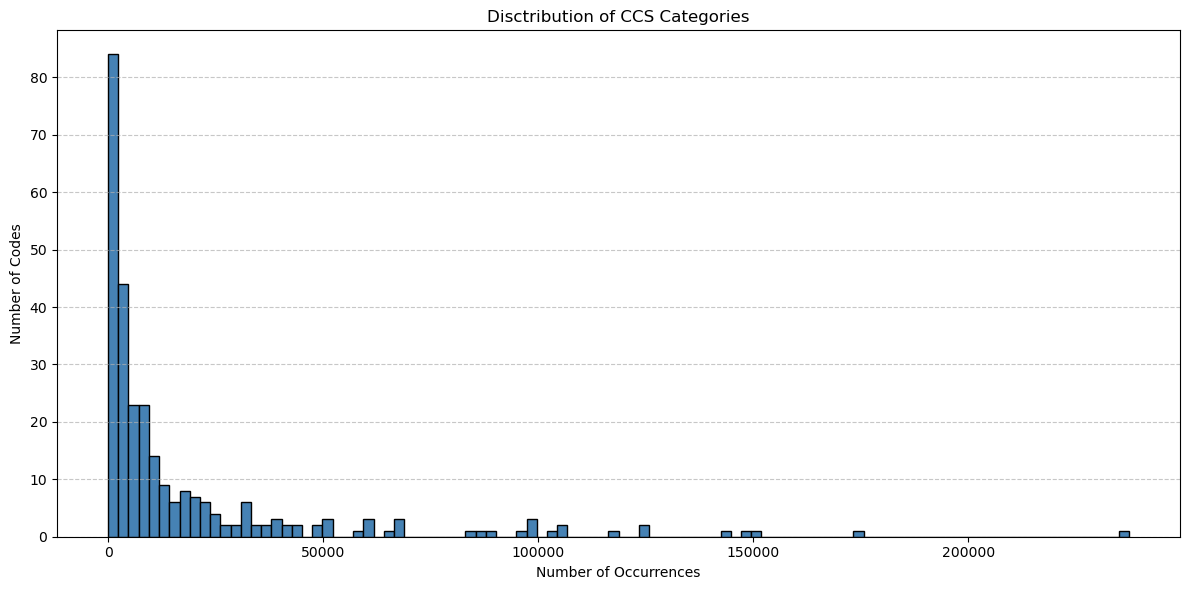

In [62]:
# Plot a histogram of CCS code occurrences
plt.figure(figsize=(12, 6))
plt.hist(diagnosis_icd_filtered_omogeneus_ccs['ccs_category'].value_counts(),bins=100, color='steelblue', edgecolor='black')
plt.xlabel('Number of Occurrences')
plt.ylabel('Number of Codes')
plt.title('Disctribution of CCS Categories')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Save the dataset

In [27]:
# save the diagnosis_icd_filtered_omogeneus_ccs DataFrame to a csv file
diagnosis_icd_filtered_omogeneus_ccs.to_csv('../data/filtered_dataset/diagnosis_icd_filtered_omogeneus_ccs.csv', index=False)
# save admissions_filtered DataFrame to a csv file
admissions_filtered.to_csv('../data/filtered_dataset/admissions_filtered.csv', index=False)